In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('credit_card_clients.csv', header=1)

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [5]:
df.shape

(30000, 25)

Since the columns BILL_AMT represents clients debt, we can sum those columns in order to have its total.

In [6]:
df['BILL_TOTAL'] = df['BILL_AMT1'] + df['BILL_AMT2'] + df['BILL_AMT3'] + df['BILL_AMT4'] + \
df['BILL_AMT5'] + df['BILL_AMT6']

In [7]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,...,19146,19131,2000,36681,10000,9000,689,679,0,109339


First of all, we can consider only two columns to cluster: Limit Bal and Bill Total.

In [8]:
X = df.iloc[:, [1, 25]].values
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]], dtype=int64)

Now, let's apply the Standard Scaler function to put both columns in the same scale. 

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

Next, we're going to use a metric called Within-cluster sum of squares (WCSS) to find out how many clusters fit our problem better. This ideal number of clusters is based on a so called Elbow Method.

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [12]:
wcss

[60000.0,
 35197.73925382836,
 20128.14098757631,
 14943.389077745102,
 10707.842075549495,
 8603.473181334297,
 7397.980104443422,
 6351.888604089764,
 5664.878200466927,
 5049.550278457274]

Plot:

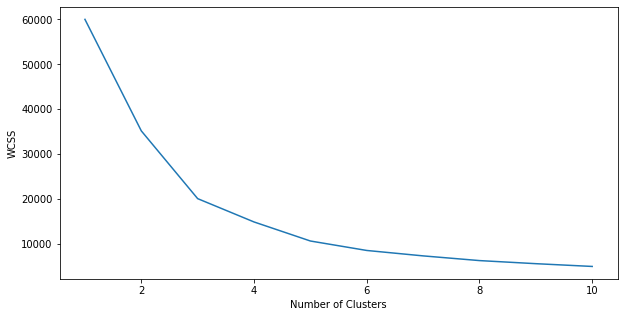

In [13]:
fig = plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

According to the plot above, we will choose 4 clusters and use the algorithm to split the clients into proper groups.

In [14]:
kmeans = KMeans(n_clusters=4, random_state=0)
previsoes = kmeans.fit_predict(X)
previsoes

array([0, 0, 0, ..., 0, 0, 0])

Plot:

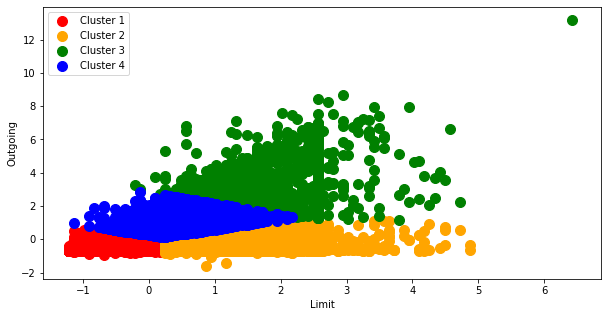

In [16]:
fig = plt.figure(figsize=(10,5))
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s=100, c='orange', label='Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[previsoes == 3, 0], X[previsoes == 3, 1], s=100, c='blue', label='Cluster 4')
plt.xlabel('Limit')
plt.ylabel('Outgoing')
plt.legend()
plt.show()